In [1]:
# ! pip install pmdarima
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt 
import math
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# q1

## q1_1

In [2]:
data = pd.read_csv('hungary_chickenpox.csv')

In [3]:
data.columns = data.columns.str.lower() 

In [4]:
data['date'] = pd.to_datetime(data['date'],format="%d/%m/%Y")
data['date2'] = data.date.copy().shift(-1)

In [5]:
data

,date,budapest,baranya,bacs,bekes,borsod,csongrad,fejer,gyor,hajdu,...,komarom,nograd,pest,somogy,szabolcs,tolna,vas,veszprem,zala,date2
0,2005-01-03,168,79,30,173,169,42,136,120,162,...,57,2,178,66,64,11,29,87,68,2005-01-10
1,2005-01-10,157,60,30,92,200,53,51,70,84,...,50,29,141,48,29,58,53,68,26,2005-01-17
2,2005-01-17,96,44,31,86,93,30,93,84,191,...,46,4,157,33,33,24,18,62,44,2005-01-24
3,2005-01-24,163,49,43,126,46,39,52,114,107,...,54,14,107,66,50,25,21,43,31,2005-01-31
4,2005-01-31,122,78,53,87,103,34,95,131,172,...,49,11,124,63,56,7,47,85,60,2005-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2014-12-01,95,12,41,6,39,0,16,15,14,...,7,13,122,4,23,4,11,110,10,2014-12-08
518,2014-12-08,43,39,31,10,34,3,2,30,25,...,20,18,70,36,5,23,22,63,9,2014-12-15
519,2014-12-15,35,7,15,0,0,0,7,7,4,...,36,4,72,5,21,14,0,17,10,2014-12-22
520,2014-12-22,30,23,8,0,11,4,1,9,10,...,17,21,12,5,17,1,1,83,2,2014-12-29


In [6]:
data.describe().reset_index()

,index,date,budapest,baranya,bacs,bekes,borsod,csongrad,fejer,gyor,...,komarom,nograd,pest,somogy,szabolcs,tolna,vas,veszprem,zala,date2
0,count,522,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,...,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,521
1,mean,2009-12-31 12:00:00,101.245211,34.204981,37.166667,28.911877,57.082375,31.488506,33.272031,41.436782,...,25.643678,21.850575,86.101533,27.609195,29.854406,20.352490,22.467433,40.636015,19.873563,2010-01-04 00:00:00
2,min,2005-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005-01-10 00:00:00
3,25%,2007-07-03 18:00:00,34.250000,8.000000,8.000000,4.000000,14.250000,6.000000,7.000000,9.000000,...,6.000000,4.000000,28.250000,6.000000,6.000000,4.000000,3.000000,7.250000,4.000000,2007-07-09 00:00:00
4,50%,2009-12-31 12:00:00,93.000000,25.000000,29.500000,14.000000,46.500000,20.500000,24.000000,35.000000,...,19.000000,15.000000,81.000000,20.500000,18.500000,12.000000,13.000000,32.000000,13.000000,2010-01-04 00:00:00
5,75%,2012-06-30 06:00:00,149.000000,51.000000,53.000000,38.750000,83.750000,47.000000,51.750000,63.000000,...,39.000000,32.750000,129.750000,41.000000,45.000000,29.000000,34.000000,59.000000,31.000000,2012-07-02 00:00:00
6,max,2014-12-29 00:00:00,479.000000,194.000000,274.000000,271.000000,355.000000,199.000000,164.000000,181.000000,...,160.000000,112.000000,431.000000,155.000000,203.000000,131.000000,141.000000,230.000000,216.000000,2014-12-29 00:00:00
7,std,NaN,76.354872,32.567222,36.843095,37.618092,50.725437,33.790208,31.397989,36.014297,...,24.467995,22.025999,66.773741,26.724236,31.814630,23.273025,25.006638,40.699471,21.999636,NaN


In [7]:
df = data[['date','budapest','szabolcs','tolna']]
df = df.set_index('date')
print(df.head(3))

            budapest  szabolcs  tolna
date                                 
2005-01-03       168        64     11
2005-01-10       157        29     58
2005-01-17        96        33     24


## q1_2

Text(0.5, 1.0, 'all rate')

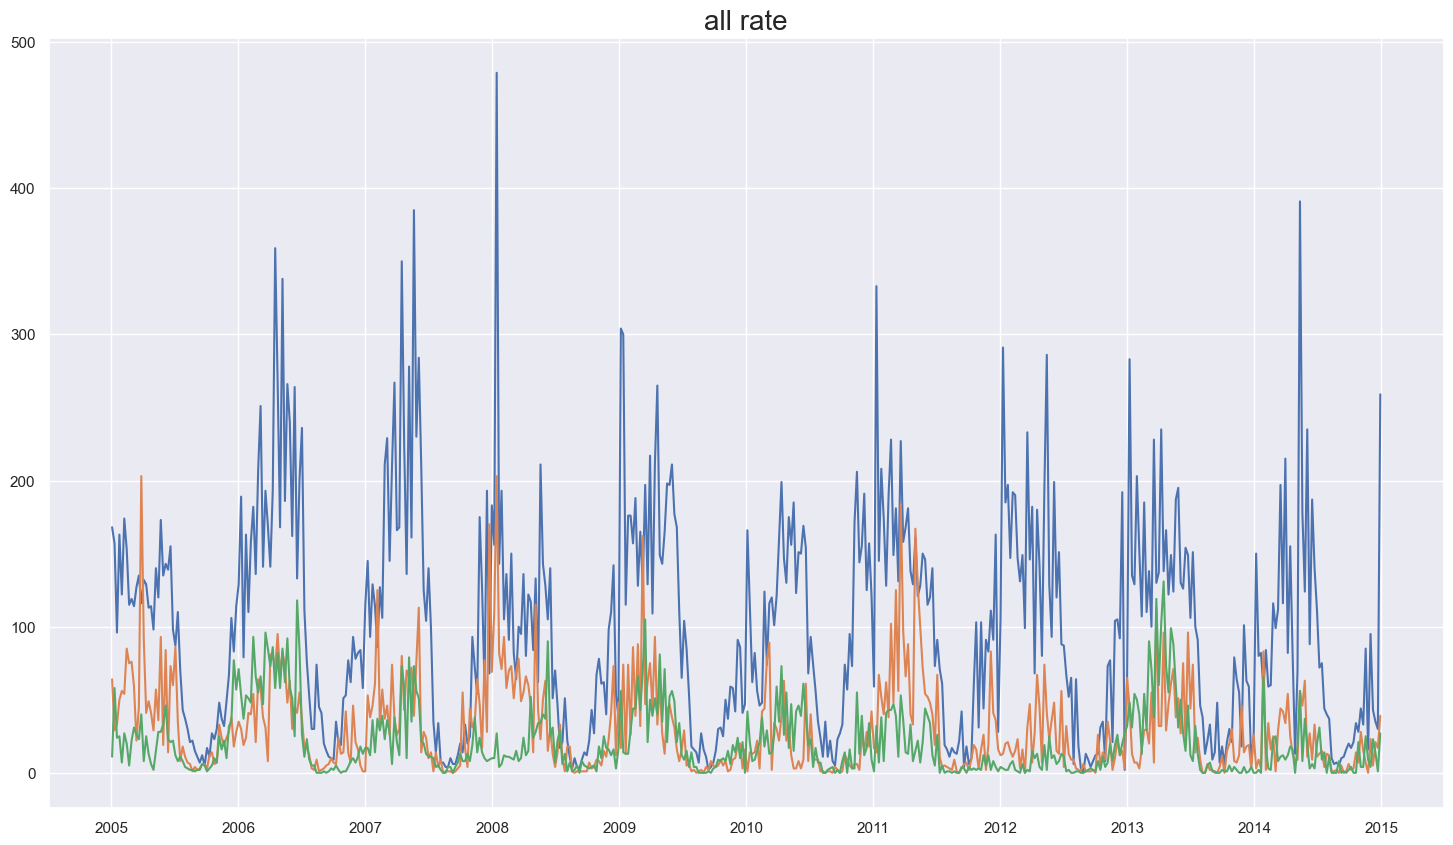

In [8]:
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (18, 10)
plt.plot(df.index, df['budapest'])
plt.plot(df.index, df['szabolcs'])
plt.plot(df.index, df['tolna'])
plt.title('all rate', fontsize=20)

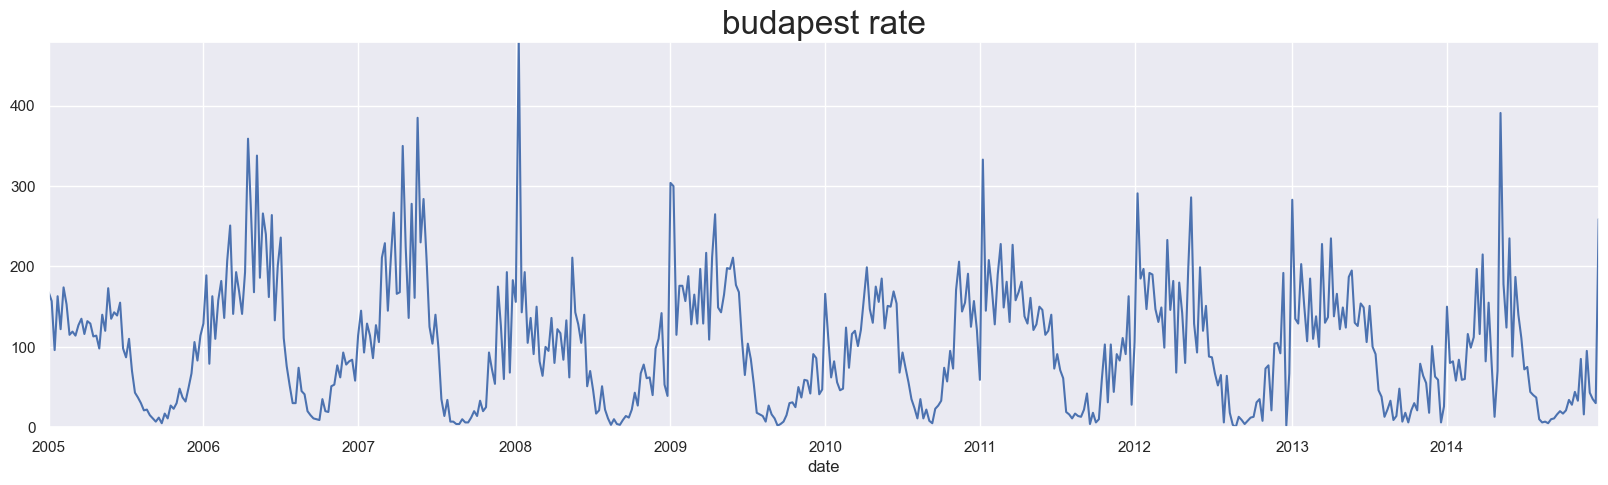

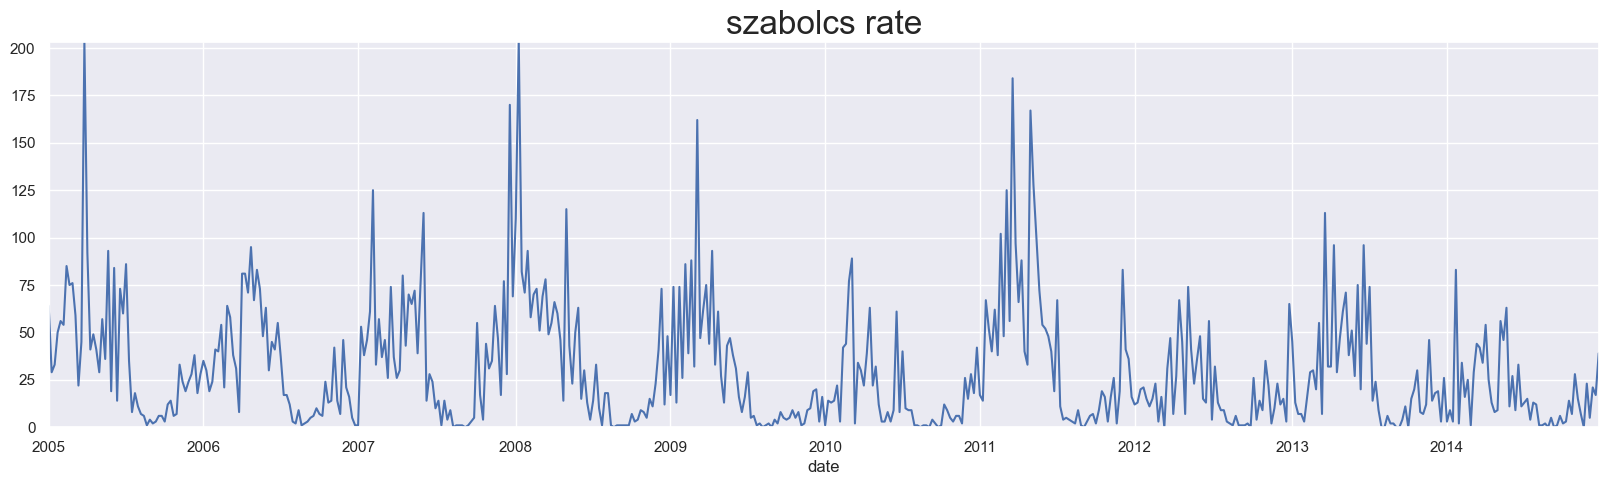

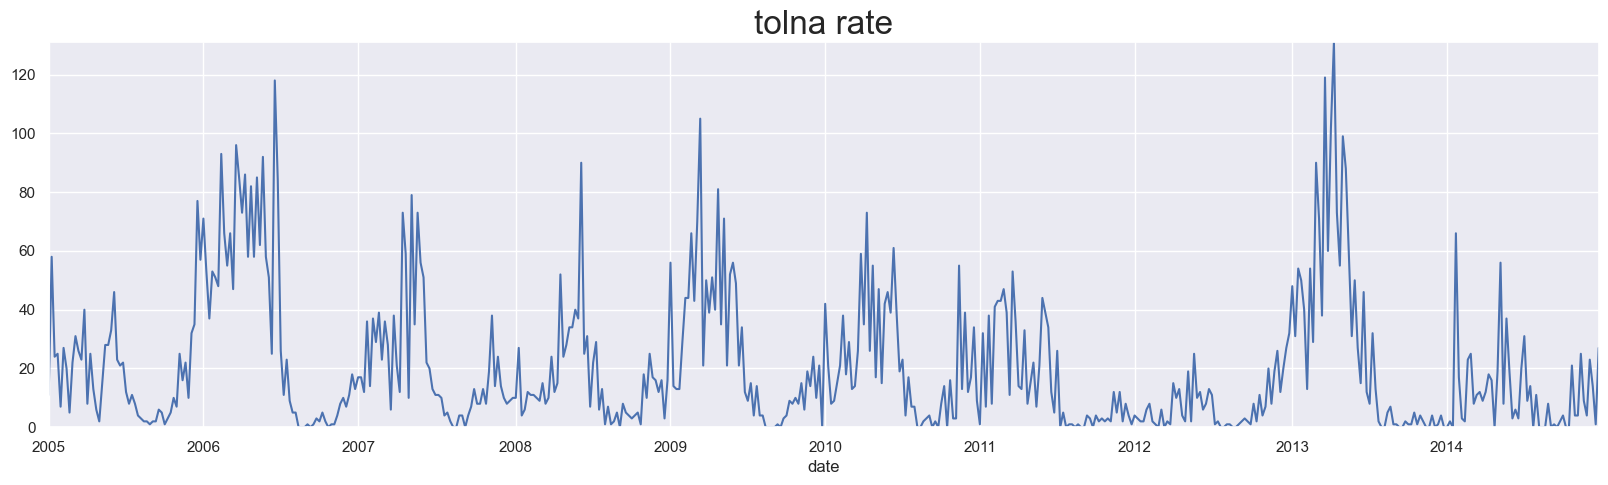

In [9]:
for col in df.columns:   
    df[col].plot(figsize=(20,5))
    plt.title(f'{col} rate', size = 24)
    plt.ylim(0,df[col].max()) #easier to compare them if they have the same magnitude.
    plt.show()

## q1_3

In [10]:
for col in df.columns:
    print(col + ':')
    print(sts.adfuller(df[col]))
    print('\n')

budapest:
(-6.933218014746708, 1.0708269234621126e-09, 12, 509, {'1%': -3.443262740636999, '5%': -2.8672350350046787, '10%': -2.569803239025633}, 5401.555790619231)


szabolcs:
(-5.216039379822507, 8.152814404830237e-06, 10, 511, {'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}, 4597.840406756066)


tolna:
(-4.71827416508676, 7.774668345727904e-05, 8, 513, {'1%': -3.443161545965353, '5%': -2.8671904981615706, '10%': -2.5697795041589244}, 4170.861305851769)




## q1_4

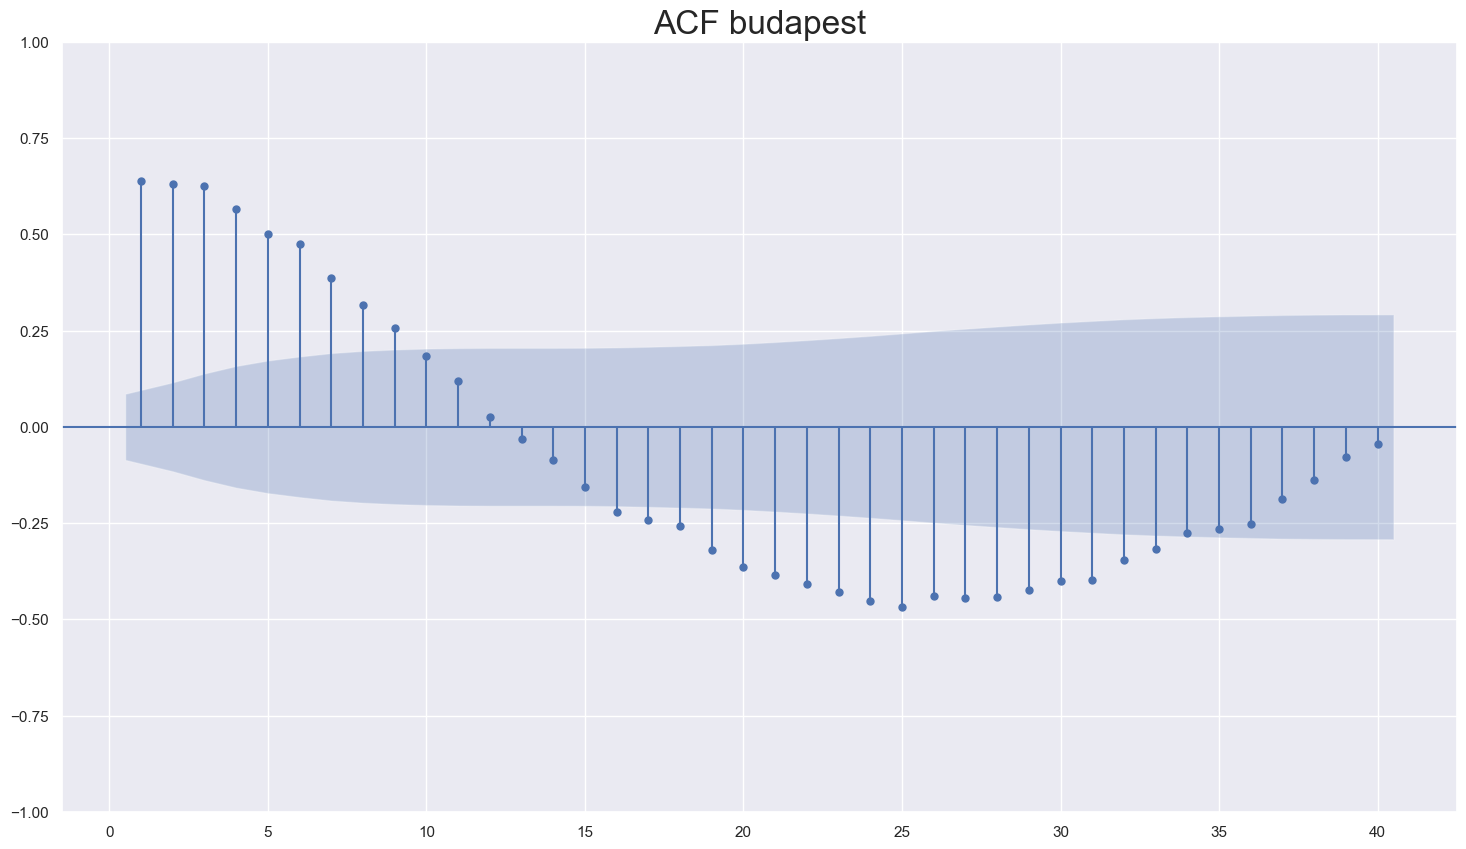

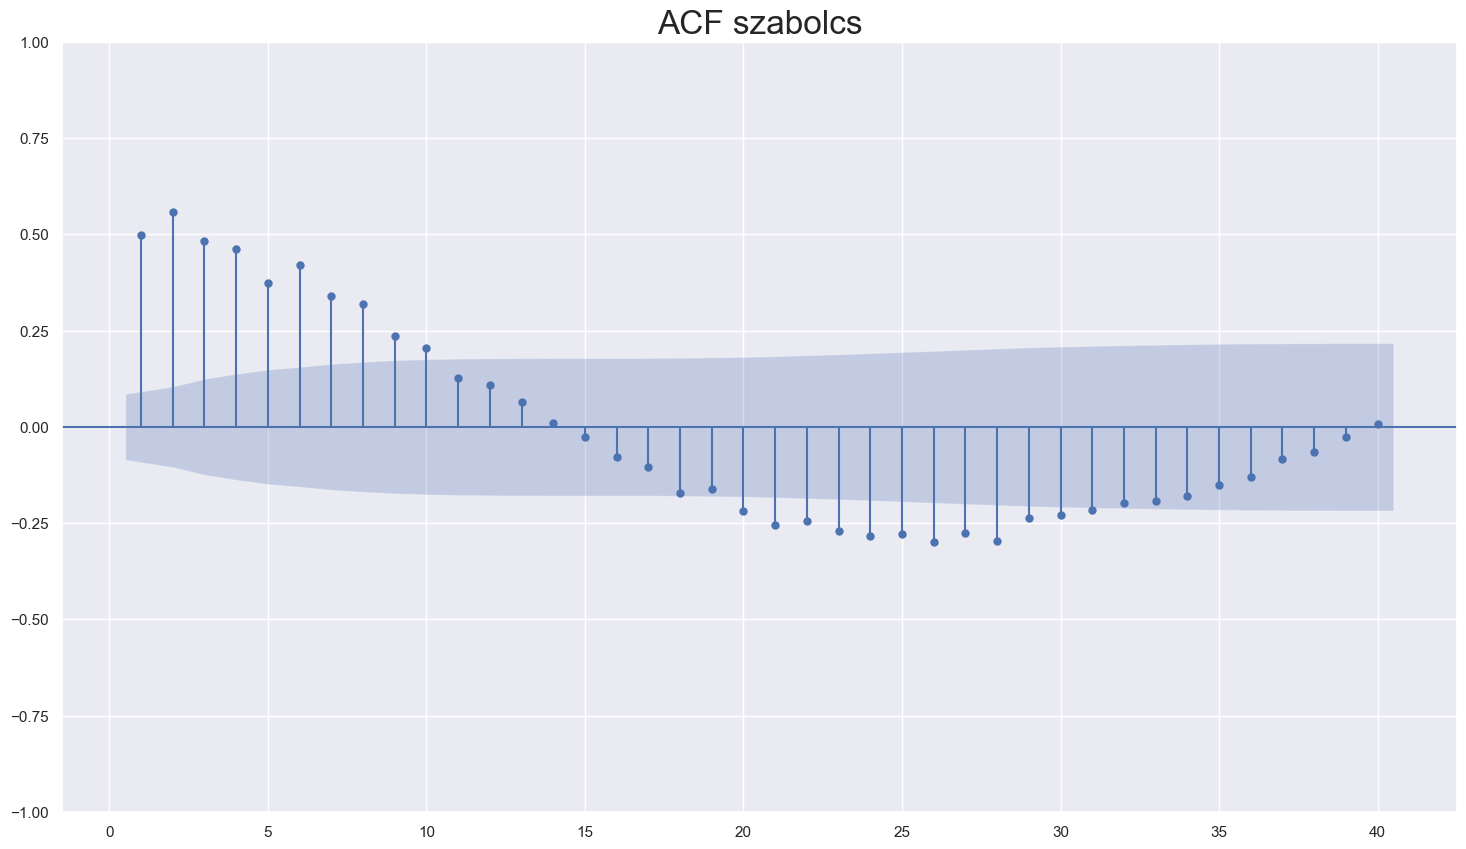

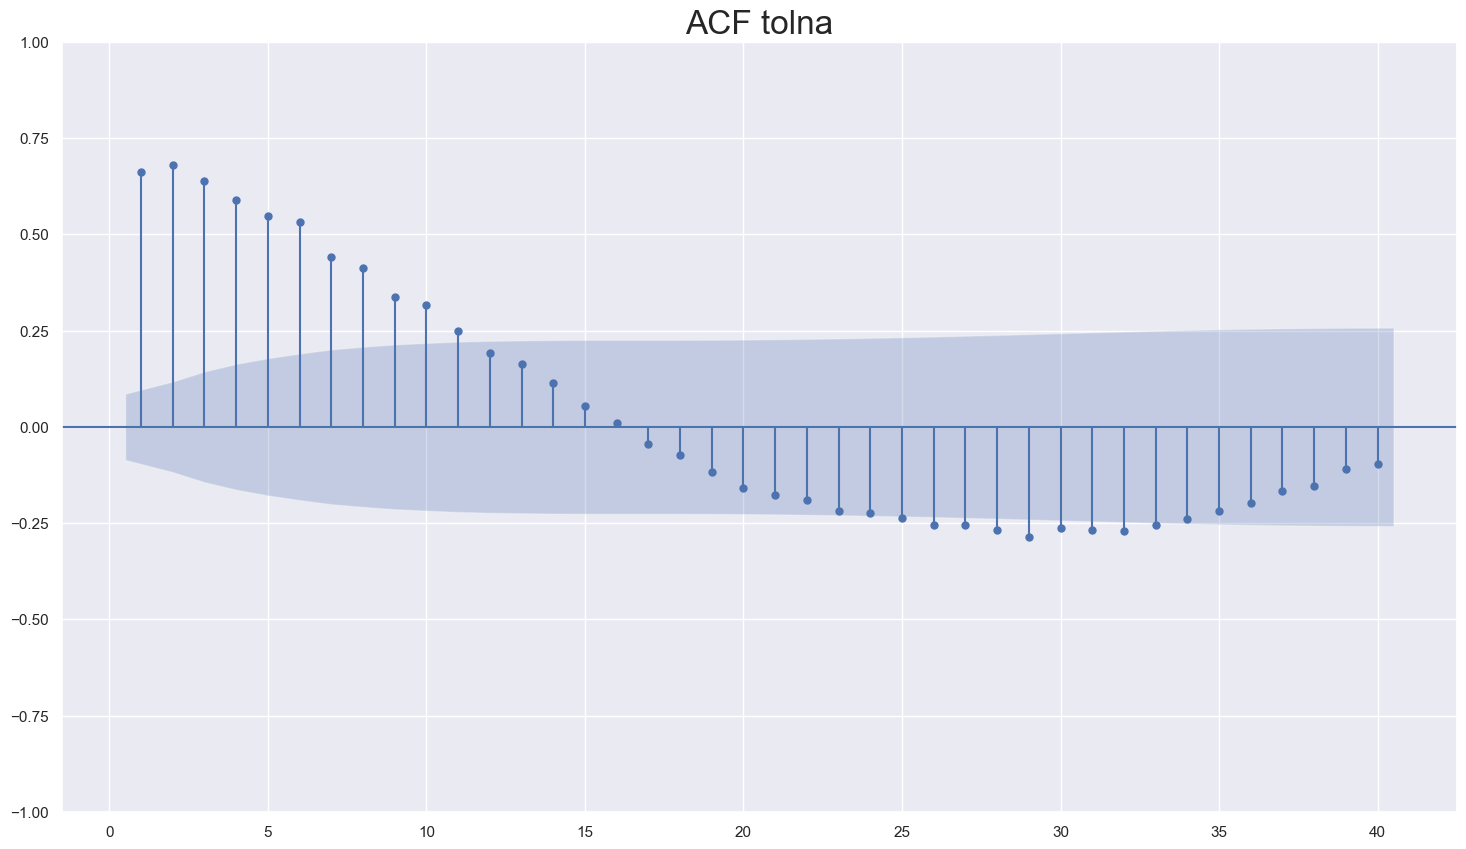

In [11]:
for col in df.columns:
    sgt.plot_acf(df[col], lags = 40, zero = False)
    plt.title(f'ACF {col}', size = 24)
    plt.show()
    print('\n')

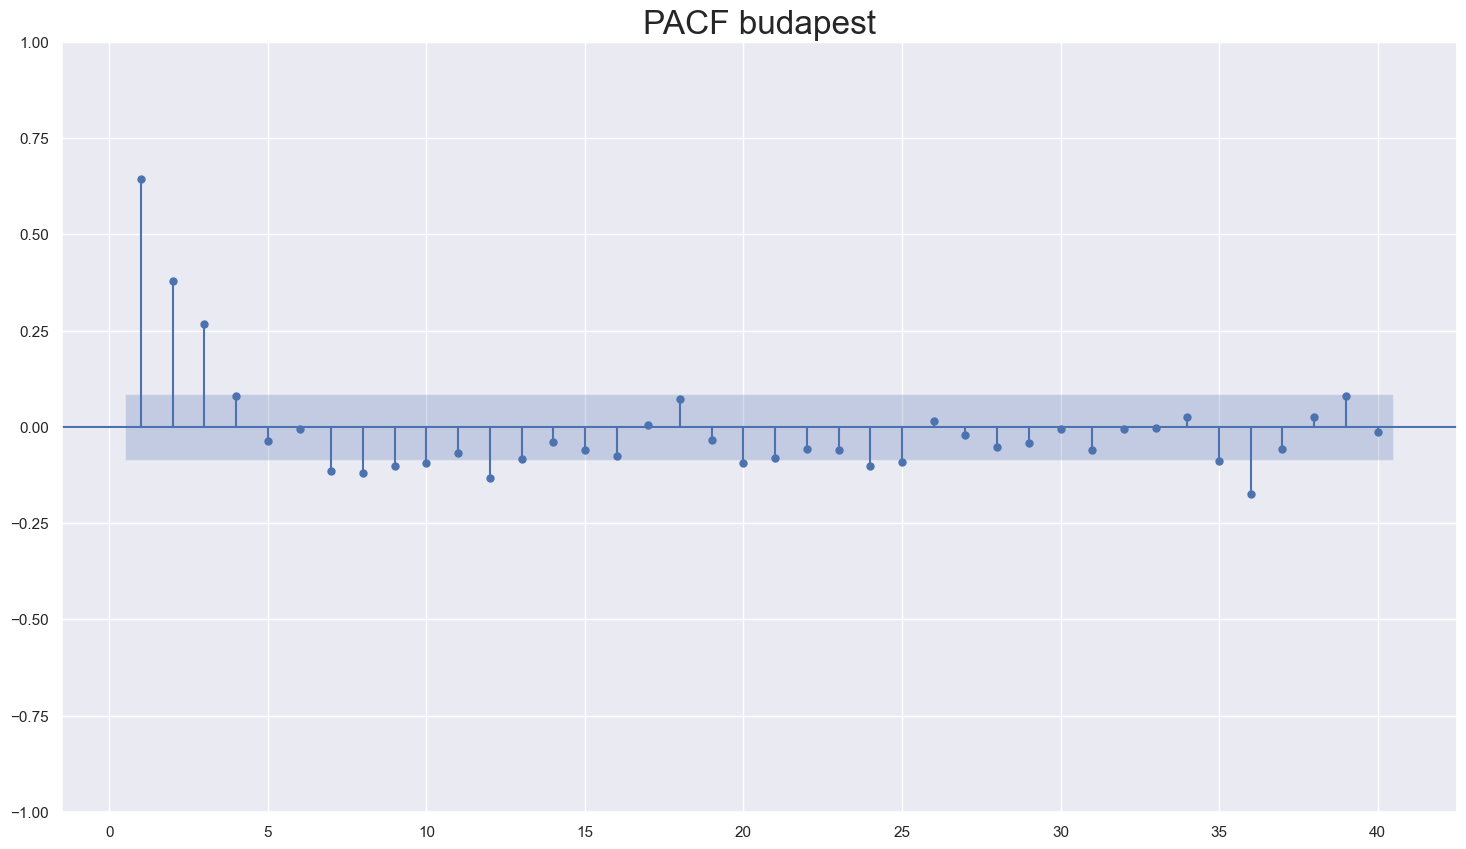

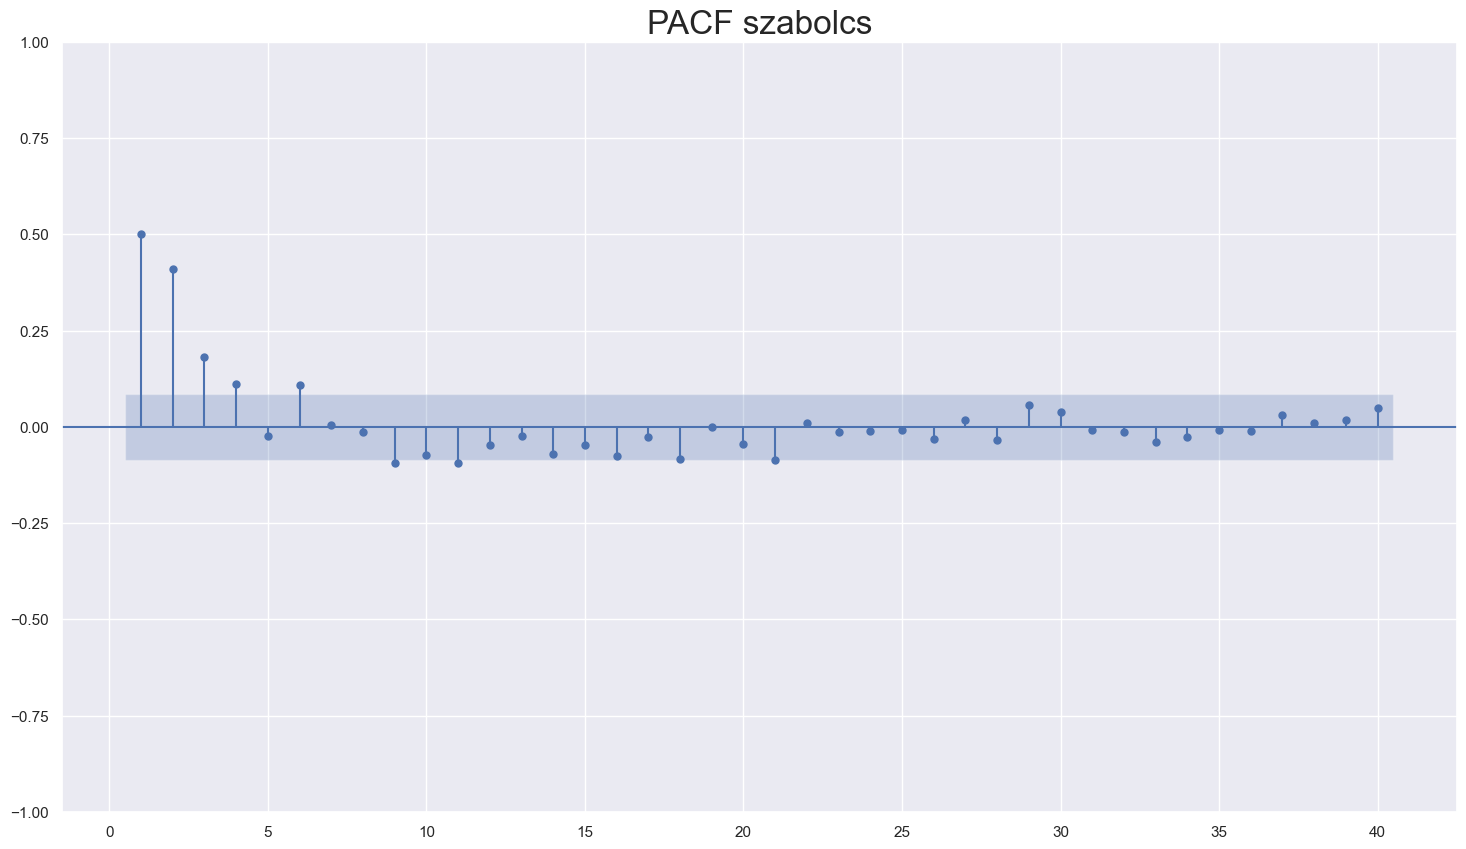

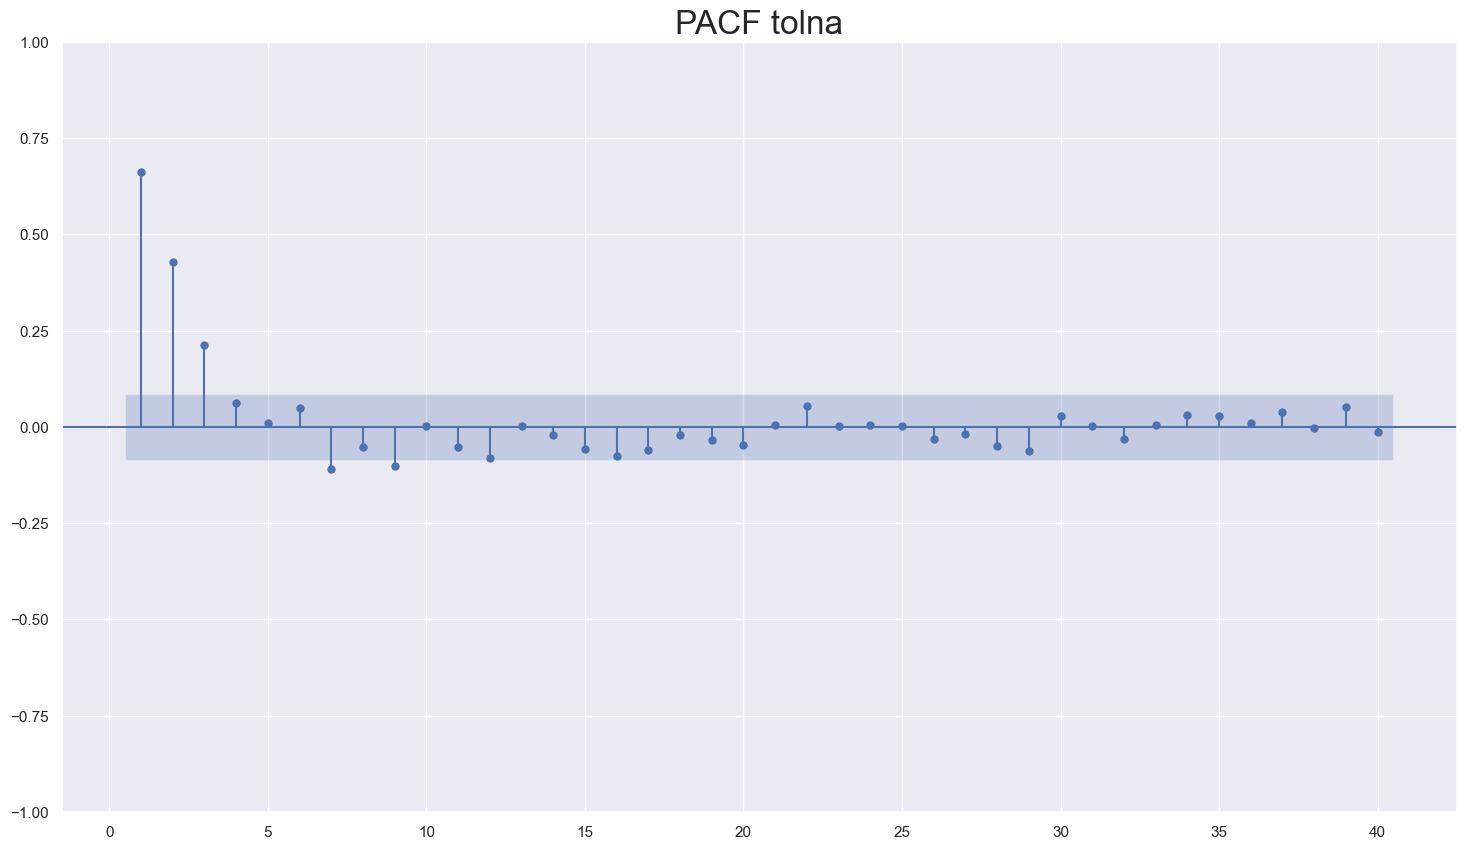

In [12]:
for col in df.columns:
    sgt.plot_pacf(df[col], lags = 40, zero = False, method = ('ols'))
    plt.title(f'PACF {col}', size = 24)
    plt.show()
    print('\n')

## q1_5

budapest :


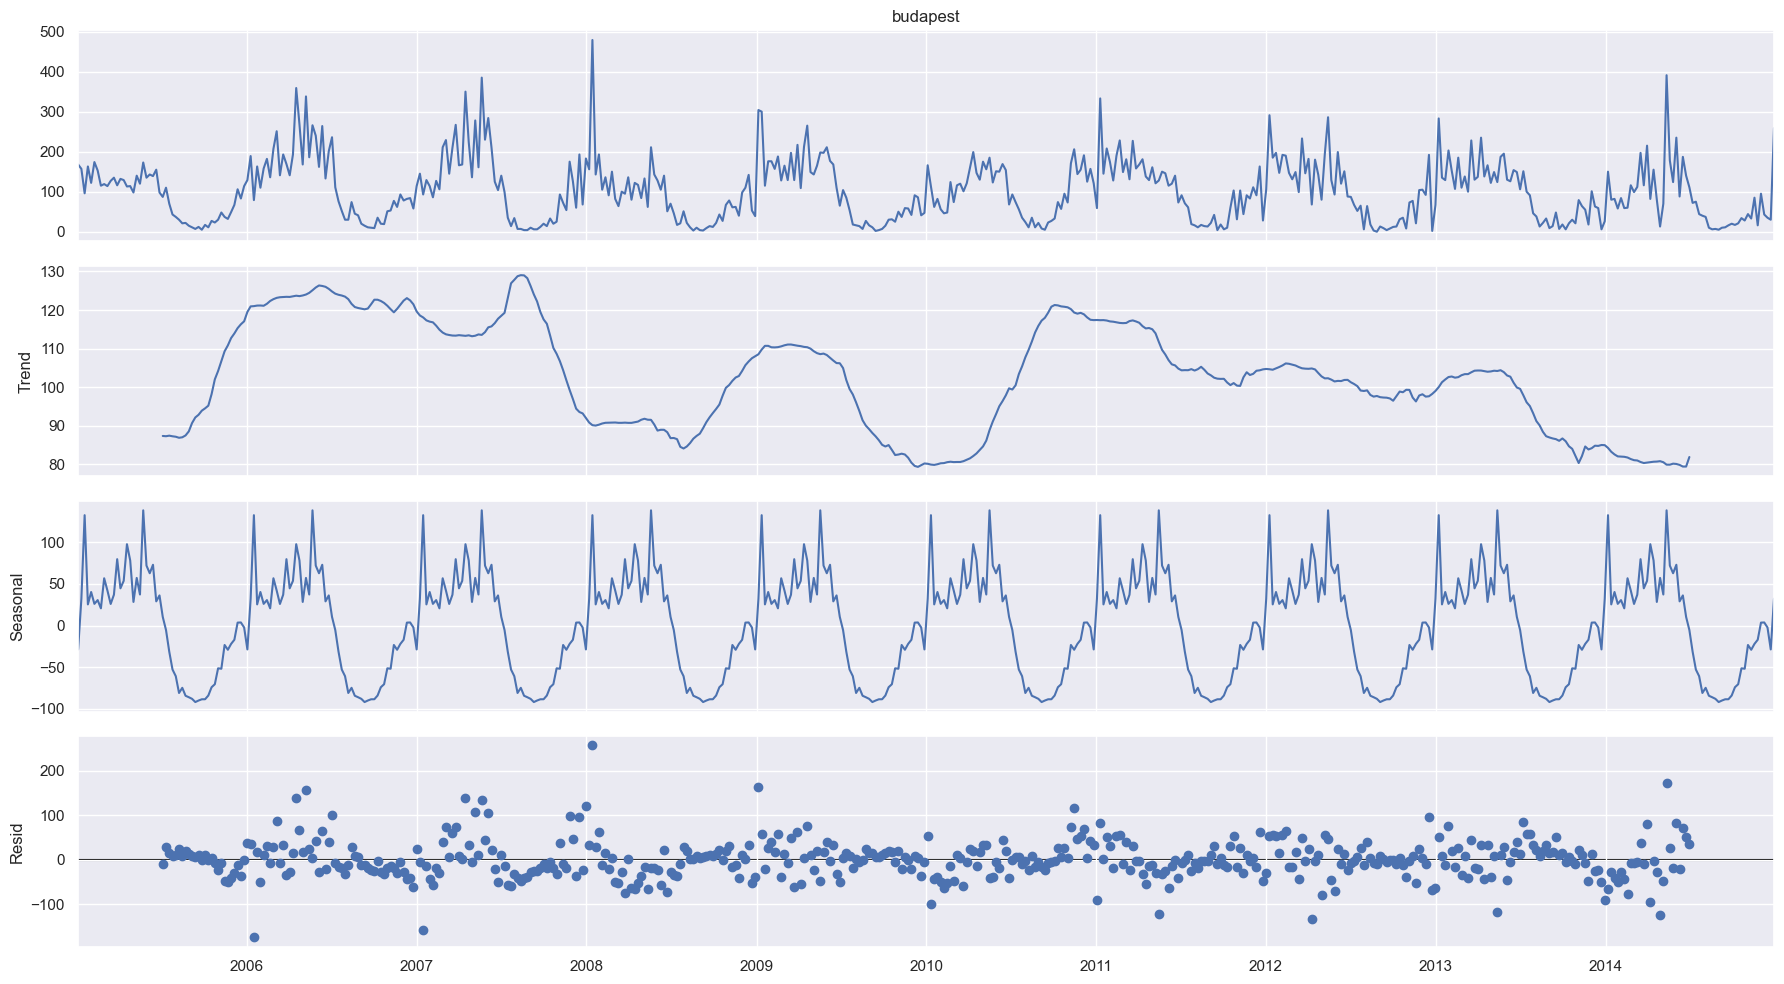



szabolcs :


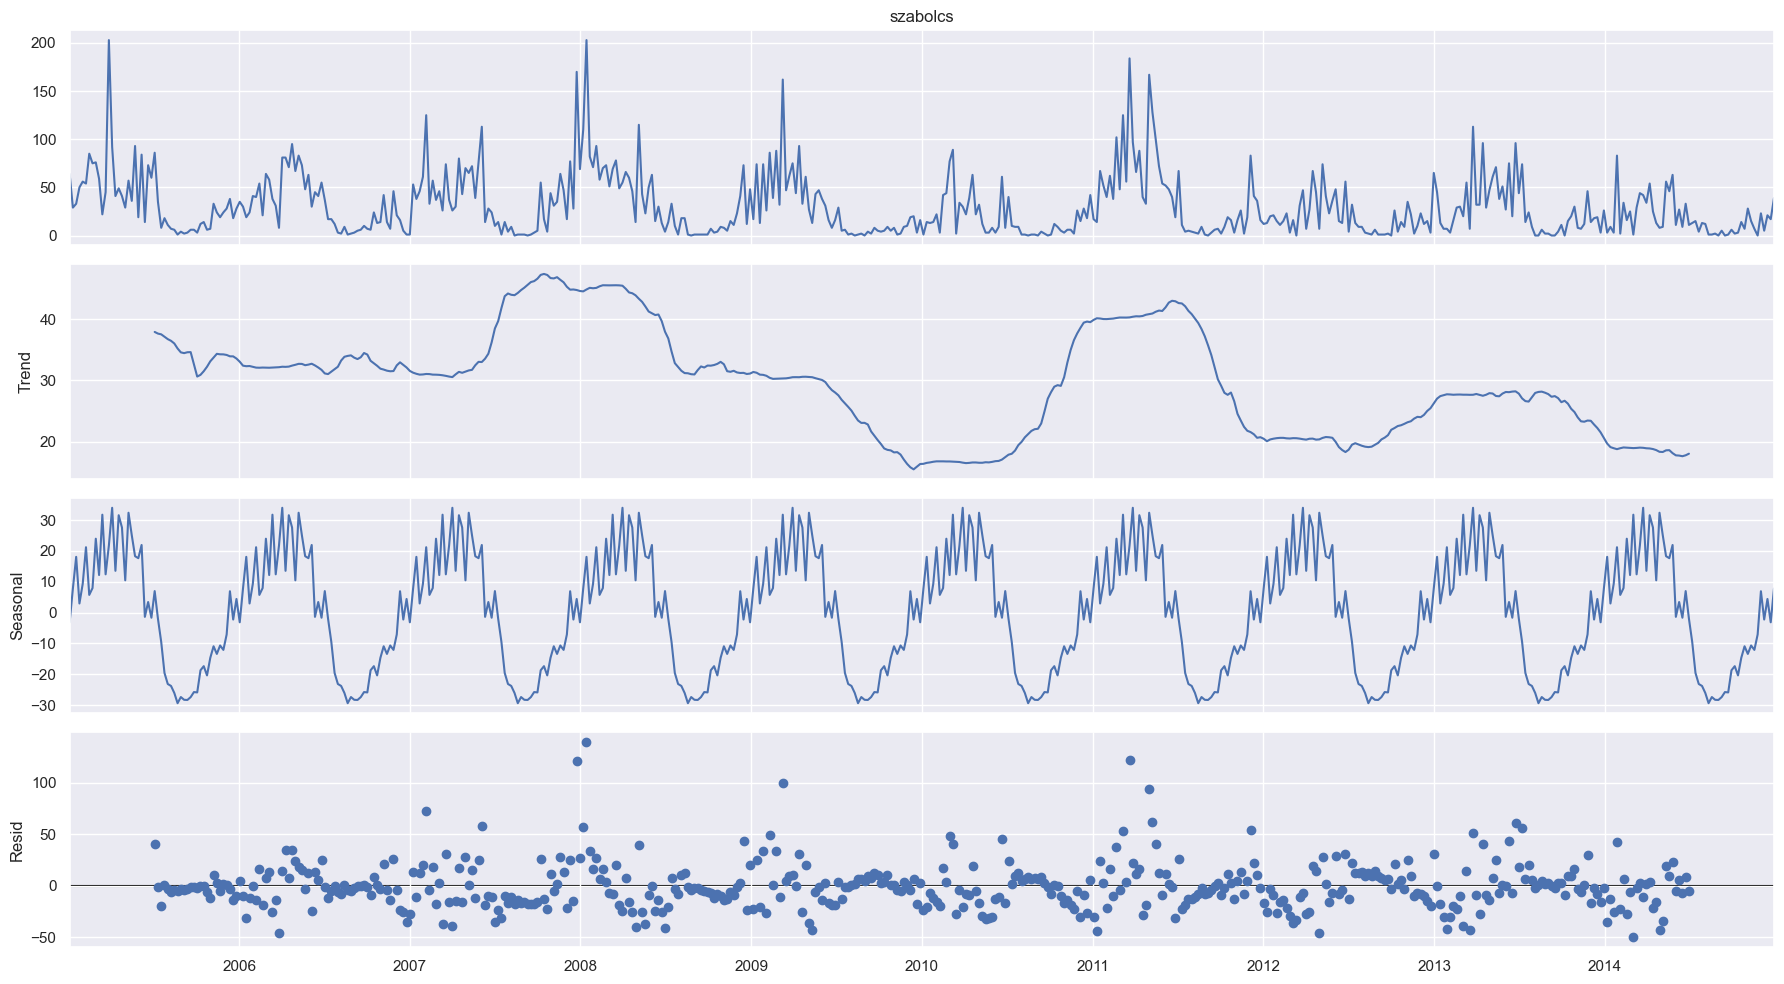



tolna :


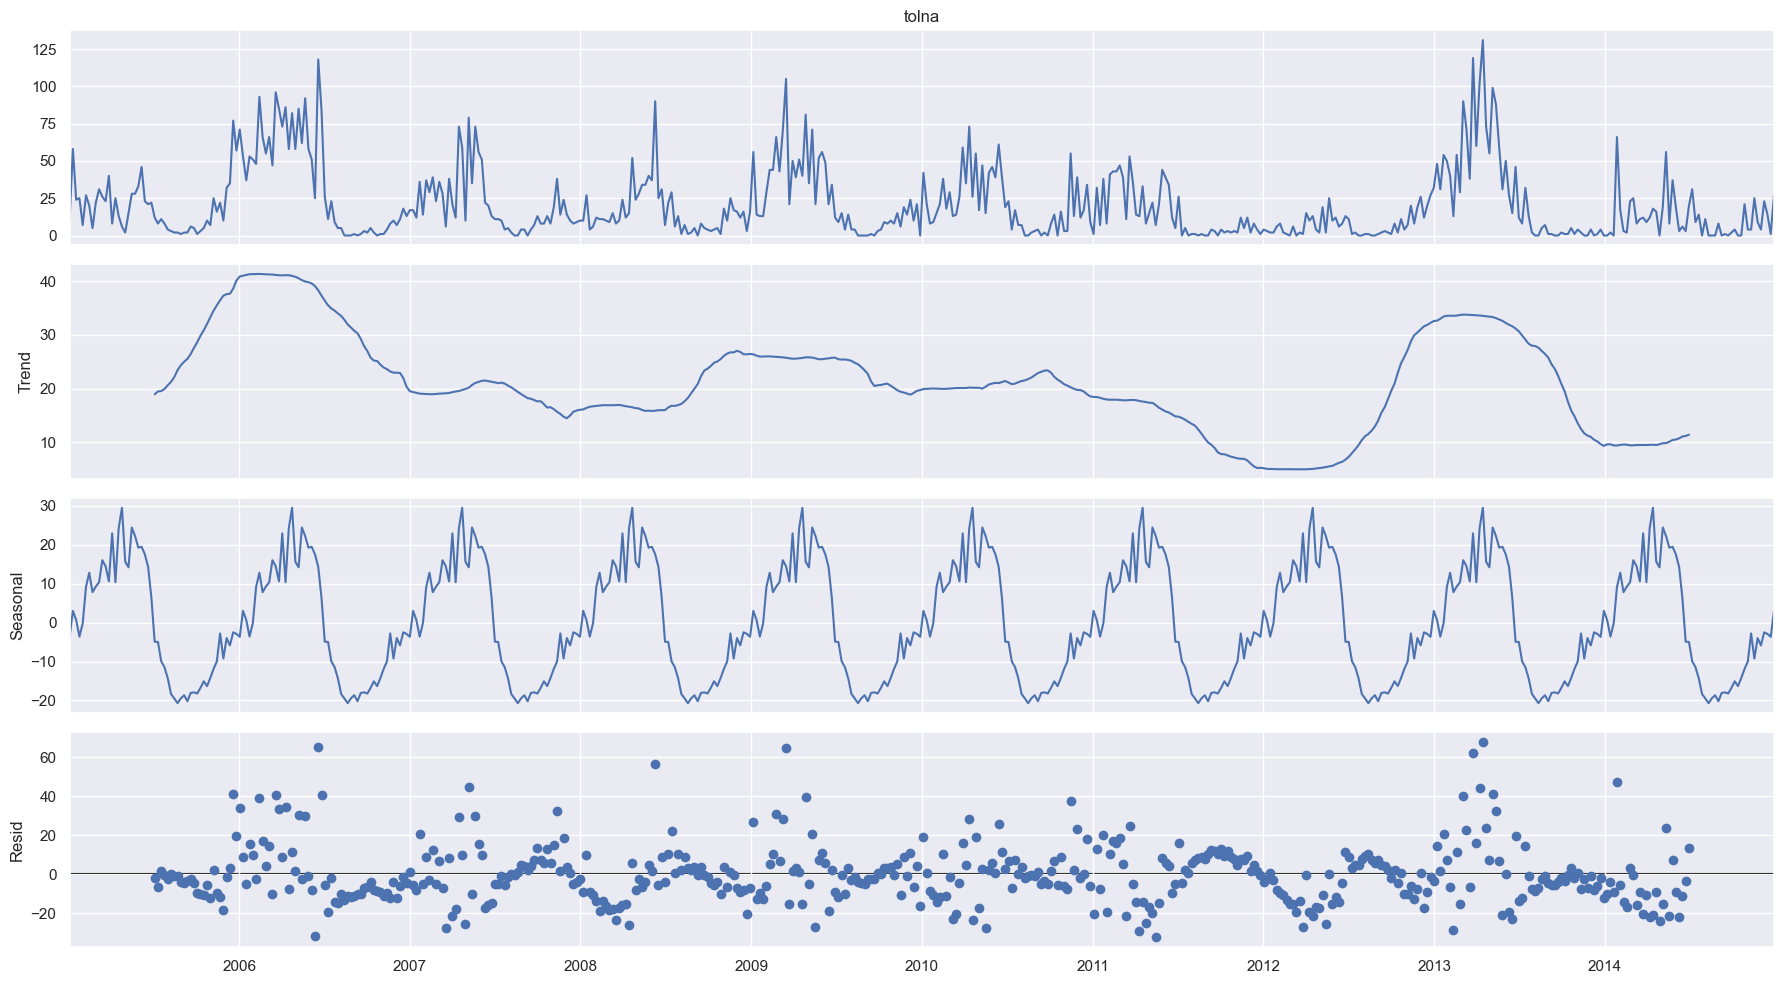

In [13]:
for col in df.columns:
    print(col,':')
    s_dec_Additive = seasonal_decompose(df[col], model = "Additive")
    s_dec_Additive.plot()
    plt.show()
    print('\n')

## q1_6 + q1_7

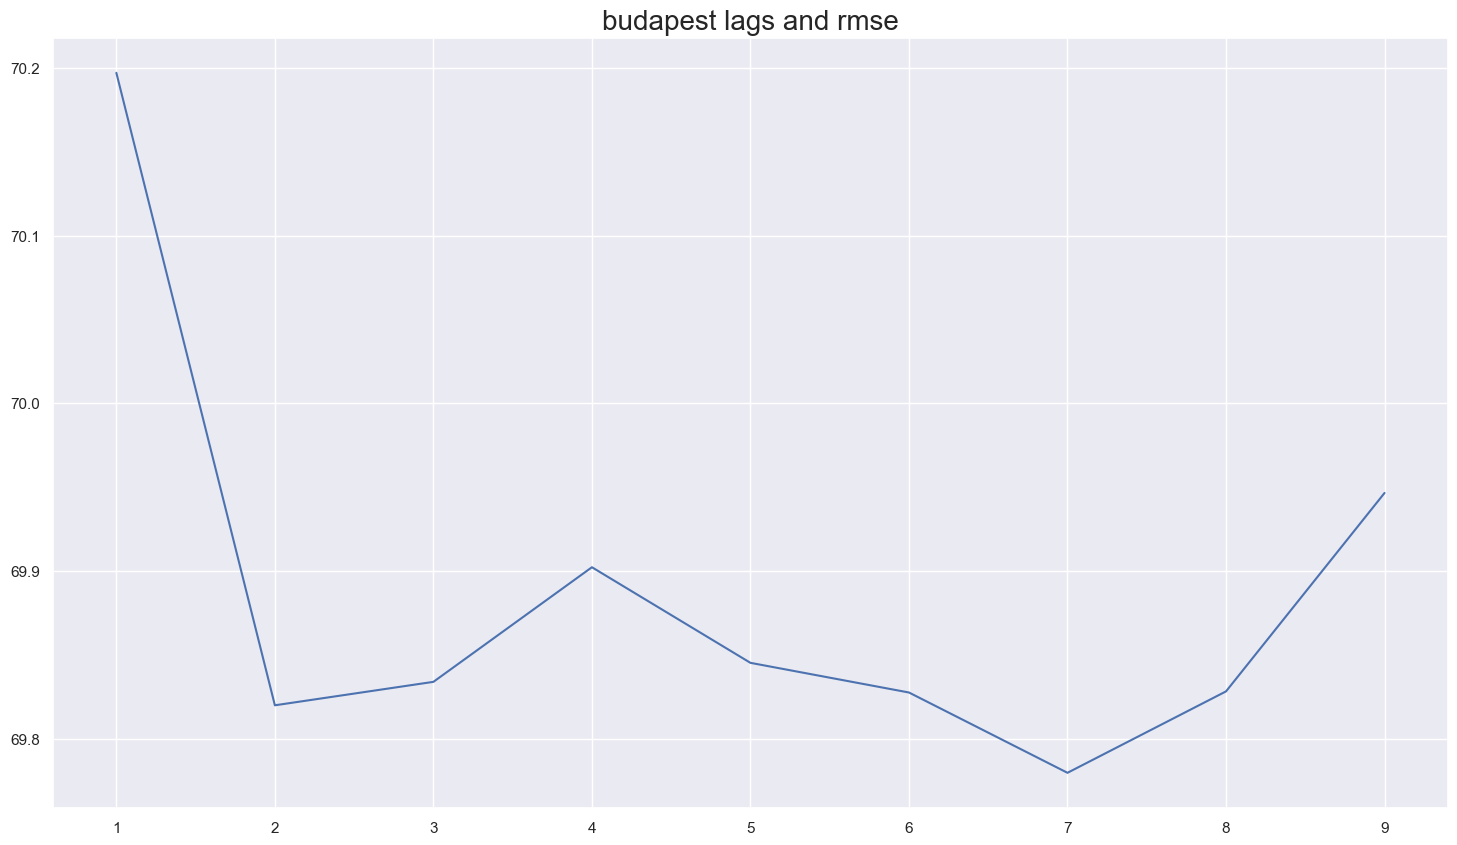

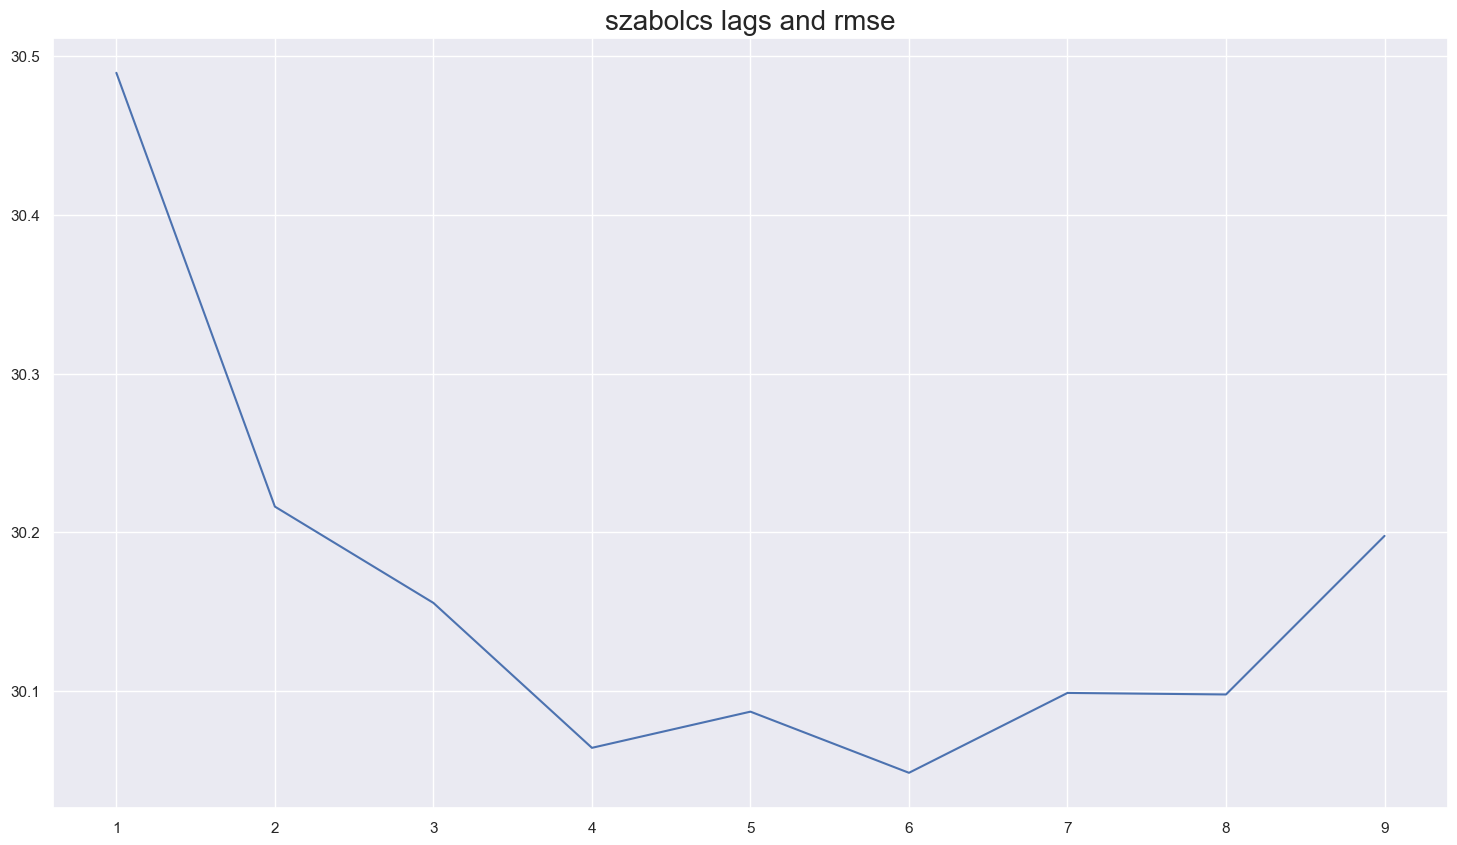

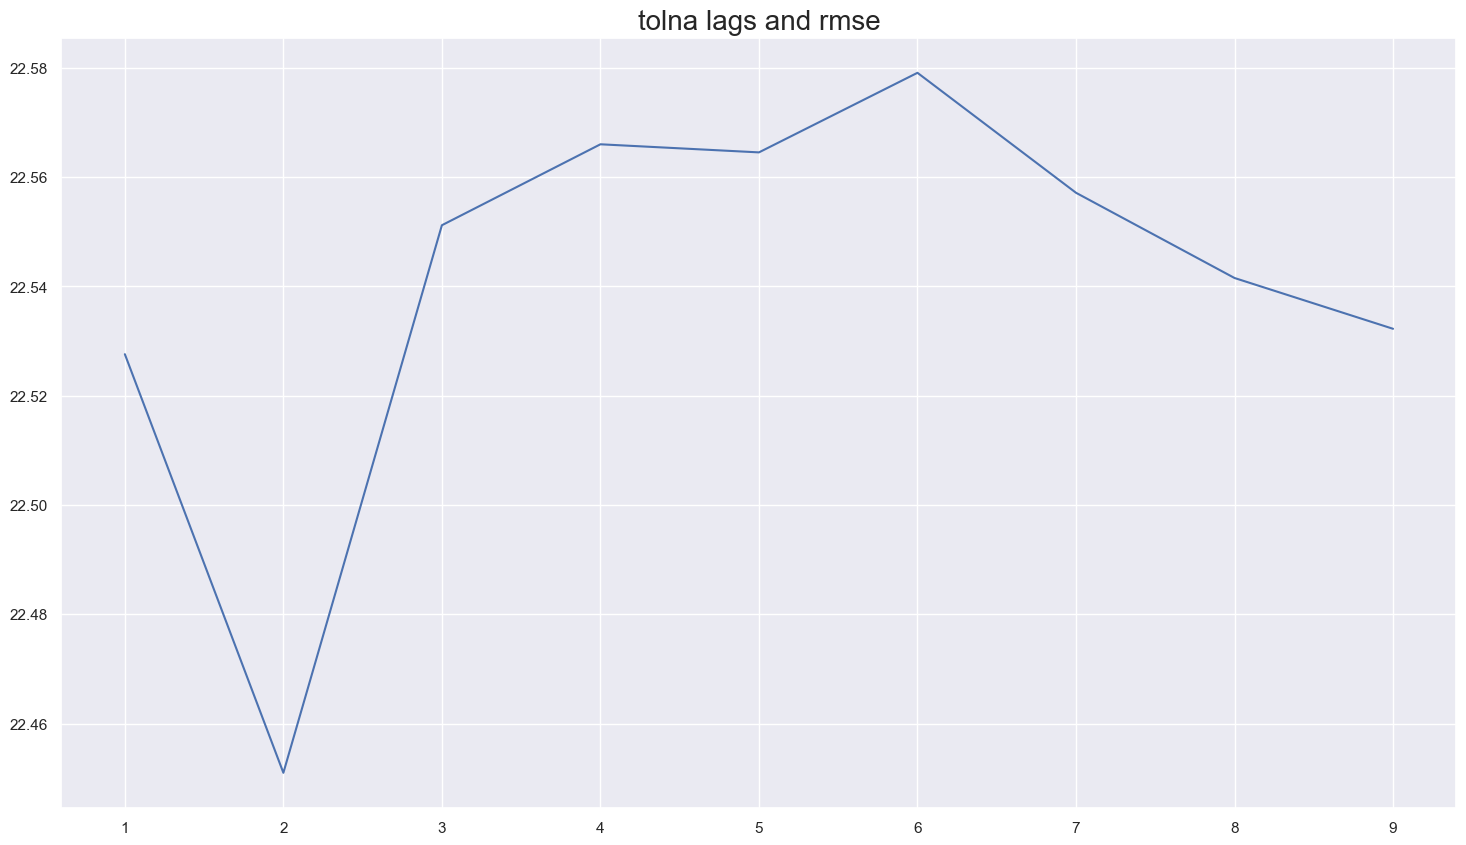

In [17]:
for col in df.columns:
    size =int(len(df[col])*0.48)
    train = df[col][:size]
    test = df[col][size:]
    max_lag = 10
    lags_and_values = {}
    for i in range(1,max_lag):
        model = ARIMA(train, order=(i,0,0)).fit()
        y_predicted = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
        RMSE = math.sqrt(np.square(np.subtract(test,y_predicted)).mean())
        lags_and_values[i] = RMSE
    plt.plot(list(lags_and_values.keys()), list(lags_and_values.values()))
    plt.title(f'{col} lags and rmse', fontsize=20)
    plt.show()

## q1_8

In [16]:
for col in df.columns:
    rmse_values = np.zeros((10, 10))
    size =int(len(df[col])*0.48)
    train = df[col][:size]
    test = df[col][size:]
    for i in range(10):
        for j in range(10):
            model = ARIMA(train, order=(i,0,j)).fit()
            y_predicted = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
            rmse_values[i, j] = math.sqrt(np.square(np.subtract(test,y_predicted)).mean())
    display(f'for the city : {col} the best lag is: {np.where(rmse_values == np.min(rmse_values))[0][0]} and the ma value is: {np.where(rmse_values ==                                           np.min(rmse_values))[1][0]} and the rmse value is {min(map(min, rmse_values))} ')

'for the city : budapest the best lag is: 8 and the ma value is: 4 and the rmse value is 62.15038749808527 '

'for the city : szabolcs the best lag is: 7 and the ma value is: 7 and the rmse value is 28.283233041322703 '

'for the city : tolna the best lag is: 7 and the ma value is: 9 and the rmse value is 22.01110190247635 '

# q2

## q2_1

In [103]:
import numpy as np

# יצירת סדרת רעש לבן
e = np.random.normal(0, 1, 100)

# יצירת סדרה ריקה ל-Yt
Yt = np.zeros_like(e)

for t in range(2, len(e)):
    Yt[t] = e[t] - e[t-1] + 0.5*e[t-2]

print(Yt)

[ 0.          0.         -2.18597261  2.70998665 -0.60207055 -0.2545329
  1.75683573 -2.22452912  3.0142825  -3.28736814  2.8874643  -1.47825057
  1.01466356 -0.78852247  1.56234205 -2.17513578  3.00600831 -1.98371233
  0.18186804  2.19436658 -2.3186831   0.5906649   0.5628374  -0.93272044
 -0.16055911 -0.08641206 -0.09833764 -1.43529701  1.16419132 -2.09871173
  2.1745908  -2.2542842   2.33811896 -2.58060083  2.14687849 -2.05419607
  2.2143005  -0.01367436 -0.92351755  0.91470644  1.64773068 -5.47420656
  3.65348981 -0.83719042  1.29074645 -1.7509628   1.02872651  1.15403817
 -0.66977837  0.83327854 -1.33614628  1.8477826  -1.97322334  1.31783318
 -2.5434567   2.19295764  0.02183209 -0.70557917 -0.68179108  3.3288782
 -3.0069301   2.5528566  -3.15141011  2.49091507  0.05415272 -2.48734515
  2.41185322 -1.73009191  1.03438874 -0.29023079 -0.01317386 -1.38882185
 -0.51314737  1.70307643 -1.2449957  -1.43658988  2.33284576 -1.14259577
  0.65874791 -1.156679    1.68639806 -0.7647264  -1.2

## q2_2

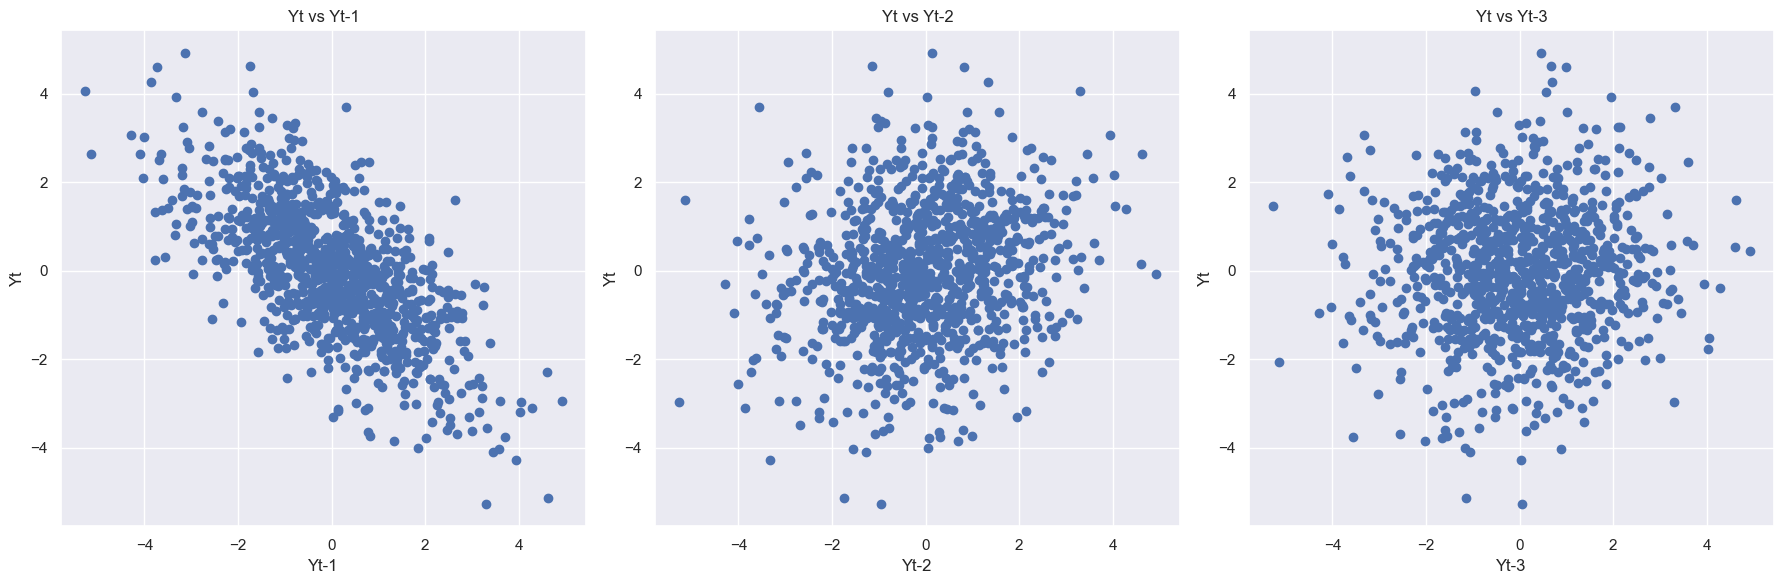

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# יצירת סדרת רעש לבן
np.random.seed(0)
e = np.random.normal(0, 1, 1000)

# יצירת הסדרה Yt
Y = np.zeros_like(e)
for t in range(2, len(e)):
    Y[t] = e[t] - e[t-1] + 0.5*e[t-2]

# יצירת הפלוטים
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(Y[:-1], Y[1:])
plt.title('Yt vs Yt-1')
plt.xlabel('Yt-1')
plt.ylabel('Yt')

plt.subplot(1, 3, 2)
plt.scatter(Y[:-2], Y[2:])
plt.title('Yt vs Yt-2')
plt.xlabel('Yt-2')
plt.ylabel('Yt')

plt.subplot(1, 3, 3)
plt.scatter(Y[:-3], Y[3:])
plt.title('Yt vs Yt-3')
plt.xlabel('Yt-3')
plt.ylabel('Yt')

plt.tight_layout()
plt.show()


## q2_4

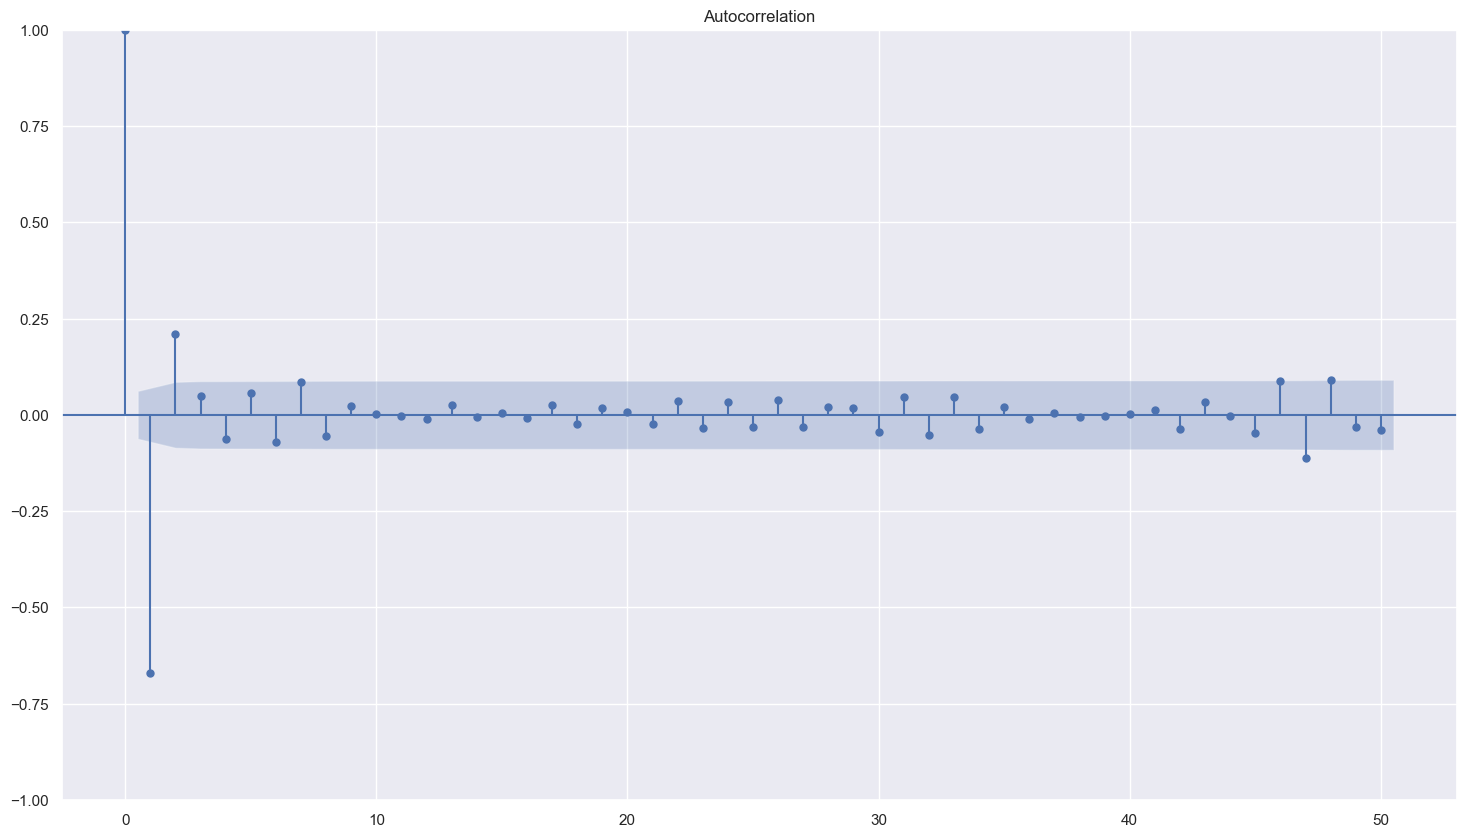

In [108]:
sgt.plot_acf(Y, lags=50)
plt.show()

## q2_5

#    𝑌𝑡 = 𝑒𝑡−1 − 𝑒𝑡−2 + 0.5𝑒𝑡−3

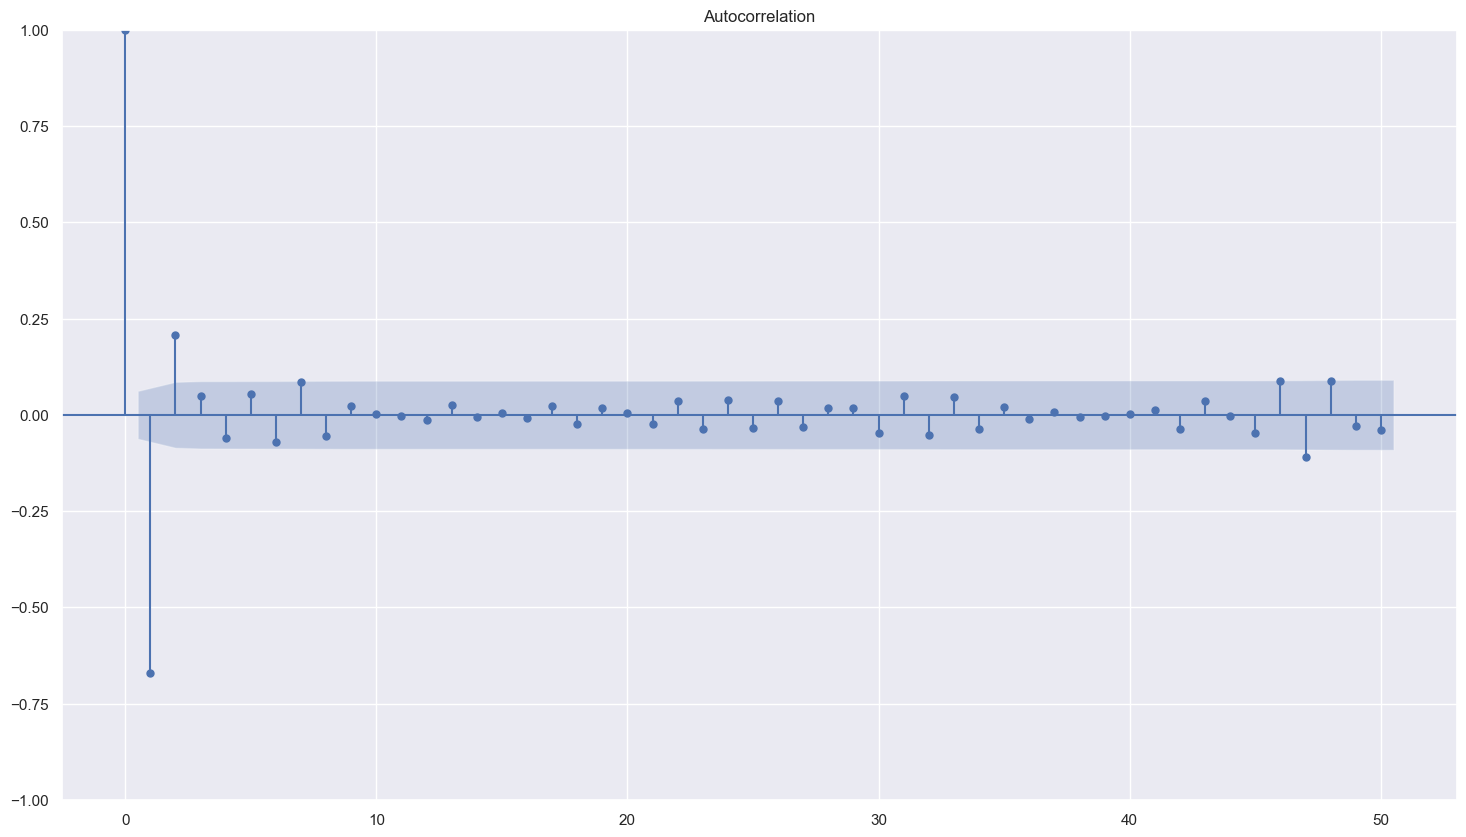

In [116]:
np.random.seed(0)
e = np.random.normal(0, 1, 1000)

# יצירת הסדרה Yt
Y = np.zeros_like(e)
for t in range(2, len(e)):
    Y[t] = e[t-1] - e[t-2] + 0.5*e[t-3]
    
sgt.plot_acf(Y, lags=50)
plt.show()